# Iris, Wine Data -> GBM, XGBoost, Light GBM

In [1]:
from sklearn import datasets as d
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
from xgboost import plot_importance
from sklearn.datasets import load_breast_cancer
import pandas as pd
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn import model_selection as ms
import time
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## (1) Iris data -> GBM, XGBoost, Light GBM

In [2]:
# import iris data
iris = d.load_iris()
irisdf=pd.DataFrame(iris.data)
irisdf.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Train, test set split
X_train, X_test, y_train, y_test = ms.train_test_split(irisdf, iris.target, test_size=0.3, random_state=0)

### Iris - GBM

- GBM을 이용하여 iris data 분류 모델을 만들었을 때 성능은? ( 성능 :   ?   )[소수점 둘째자리까지]

In [4]:
# gbm

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)


start_time=time.time()

print('GBM 정확도: {0:.2f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.6f} 초'.format(time.time()-start_time))

GBM 정확도: 0.98
GBM 수행 시간: 0.000126 초


### Iris - XGBoost

- xgboostclassifier를 이용하여 iris data 분류 모델을 만들어 성능을 적고 ( 성능 :   ?   )[소수점 둘째자리까지]
- plot_importance를 사용하여 중요한 피처 순서대로 나열하라(? - ? - ? - ?)

In [5]:
# xgboostclassifier

xgb_clf = XGBClassifier(random_state=0)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)


print('성능 : ', np.round(accuracy_score(y_test , xgb_pred),2))

성능 :  0.98


In [23]:
#plot_importance graph

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, eval_set=evals, verbose=True, early_stopping_rounds=100)
w_preds=xgb_wrapper.predict(X_test)

[0]	validation_0-merror:0.022222
Will train until validation_0-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.022222
[2]	validation_0-merror:0.022222
[3]	validation_0-merror:0.022222
[4]	validation_0-merror:0.022222
[5]	validation_0-merror:0.022222
[6]	validation_0-merror:0.022222
[7]	validation_0-merror:0.022222
[8]	validation_0-merror:0.022222
[9]	validation_0-merror:0.022222
[10]	validation_0-merror:0.022222
[11]	validation_0-merror:0.022222
[12]	validation_0-merror:0.022222
[13]	validation_0-merror:0.022222
[14]	validation_0-merror:0.022222
[15]	validation_0-merror:0.022222
[16]	validation_0-merror:0.022222
[17]	validation_0-merror:0.022222
[18]	validation_0-merror:0.022222
[19]	validation_0-merror:0.022222
[20]	validation_0-merror:0.022222
[21]	validation_0-merror:0.022222
[22]	validation_0-merror:0.022222
[23]	validation_0-merror:0.022222
[24]	validation_0-merror:0.022222
[25]	validation_0-merror:0.022222
[26]	validation_0-merror:0.022222
[27]	validation_0-merror

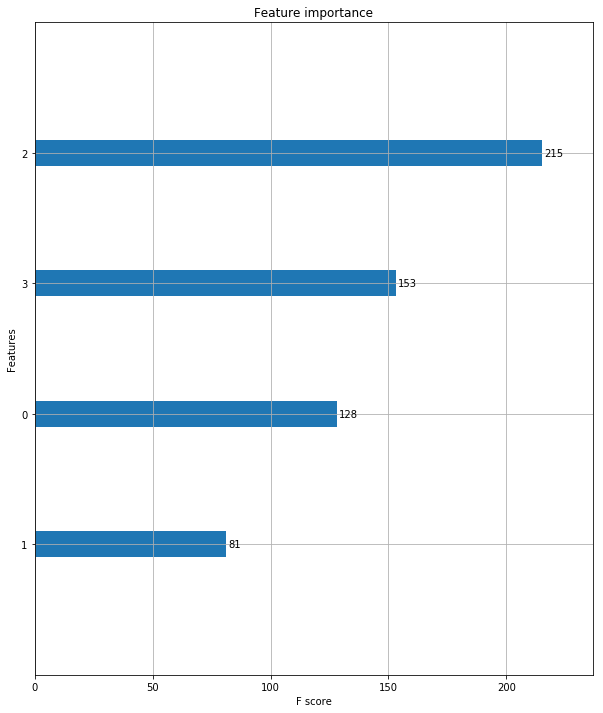

In [25]:
f, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)

In [26]:
# 2-3-0-1

### Iris - Light GBM

- LightGBM을 이용하여 iris data 분류 모델을 만들었을 때 성능은? ( 성능 :  ?    )[소수점 둘째자리까지]

In [27]:
# lgbm

lgbm = LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)


print('성능 : ', round(accuracy_score(y_test , lgbm_pred),2))

성능 :  0.98


## (2) wine data -> GBM, XGBoost, Light GBM

In [28]:
# import wine data
wine = d.load_wine()
winedf=pd.DataFrame(wine.data)
winedf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [29]:
# Train, test set split
X_train, X_test, y_train, y_test = ms.train_test_split(winedf, wine.target, test_size=0.3, random_state=0)

### Wine - GBM

- GBM을 이용하여 wine data 분류 모델을 만들었을 때 성능은? ( 성능 : ?    )[소수점 둘째자리까지]

In [30]:
# gbm

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)


start_time=time.time()



print('GBM 정확도: {0:.4f}'.format(round(gb_accuracy, 2)))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GBM 정확도: 0.9400
GBM 수행 시간: 0.0 초


### Wine - XGBoost

- xgboostclassifier를 이용하여 wine data 분류 모델을 만들어 성능을 적고 ( 성능 : ?     )[소수점 둘째자리까지]
- plot_importance를 사용하여 중요한 피처 4개를 순서대로 나열하라(?-?-?-?)

In [31]:
# xgboost

xgb_clf = XGBClassifier(random_state=0)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)



print('성능 : ', round(accuracy_score(y_test , xgb_pred), 2))

성능 :  0.96


In [32]:
# plot_importance graph

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, eval_set=evals, verbose=True, early_stopping_rounds=100)
w_preds=xgb_wrapper.predict(X_test)

[0]	validation_0-merror:0.037037
Will train until validation_0-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.037037
[2]	validation_0-merror:0.037037
[3]	validation_0-merror:0.037037
[4]	validation_0-merror:0.037037
[5]	validation_0-merror:0.037037
[6]	validation_0-merror:0.037037
[7]	validation_0-merror:0.037037
[8]	validation_0-merror:0.037037
[9]	validation_0-merror:0.037037
[10]	validation_0-merror:0.037037
[11]	validation_0-merror:0.037037
[12]	validation_0-merror:0.037037
[13]	validation_0-merror:0.037037
[14]	validation_0-merror:0.037037
[15]	validation_0-merror:0.037037
[16]	validation_0-merror:0.037037
[17]	validation_0-merror:0.037037
[18]	validation_0-merror:0.037037
[19]	validation_0-merror:0.037037
[20]	validation_0-merror:0.037037
[21]	validation_0-merror:0.037037
[22]	validation_0-merror:0.037037
[23]	validation_0-merror:0.037037
[24]	validation_0-merror:0.037037
[25]	validation_0-merror:0.037037
[26]	validation_0-merror:0.037037
[27]	validation_0-merror

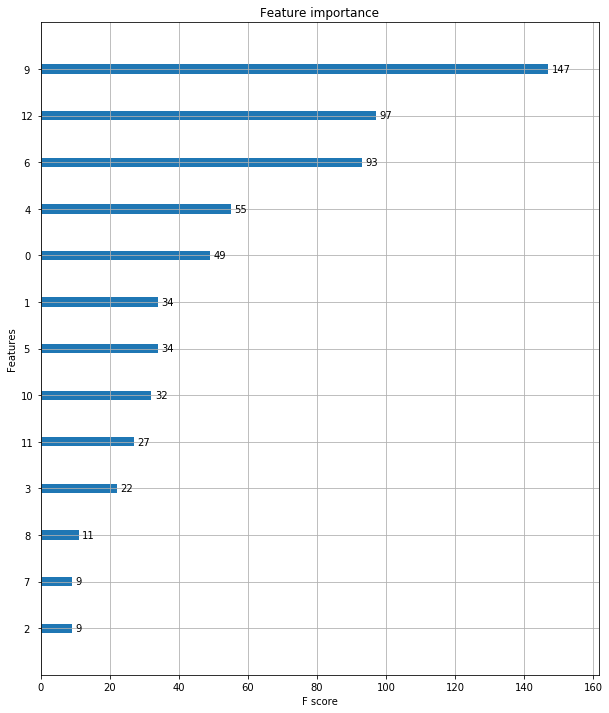

In [33]:
f, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)

### Wine - LightGBM

- LightGBM을 이용하여 wine data 분류 모델을 만들었을 때 성능은? ( 성능 :   ?   )[소수점 둘째자리까지]

In [34]:
# lgbm

lgbm = LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)


print('성능 : ', round(accuracy_score(y_test , lgbm_pred), 2))

성능 :  0.94
